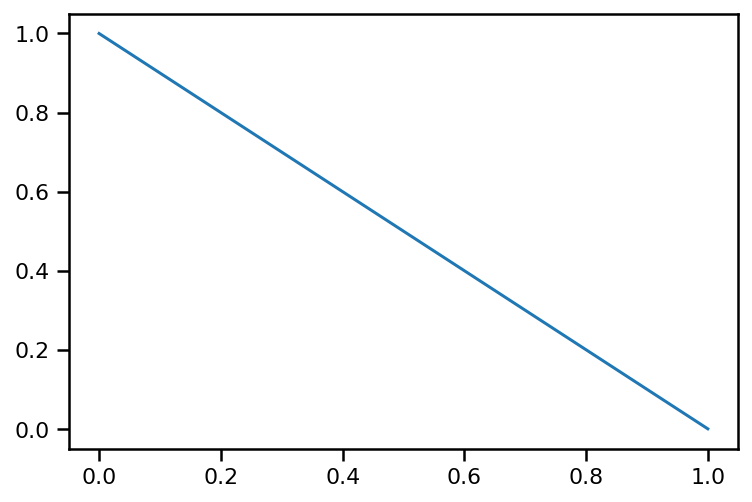

In [1]:
#%%capture
%matplotlib inline
import seaborn as sns
sns.set_context('notebook')
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
plt.plot([0,1],[1,0])
plt.show()
from neuronunit.optimisation.optimization_management import test_all_objective_test
import numpy as np
from IPython.display import display#, HTML
from neuronunit.plottools import plot_score_history1
from neuronunit.optimisation.optimization_management import check_binary_match, three_step_protocol, TSD
import pandas as pd
from collections import OrderedDict
from neuronunit.optimisation.model_parameters import MODEL_PARAMS
import pickle
from dask.distributed import Client
#import dask
#dask.config.set(scheduler='threads')
#client = Client()
#client.get_versions(check=True)

#fps = list(MODEL_PARAMS["NEURONHH"].keys()) #
#3model_type="NEURONHH"
#sim_tests, OM, target = test_all_objective_test(fps,model_type=model_type)

# Simulated Data 
and select model parameters that are free to vary

In [2]:
fps = list(MODEL_PARAMS["IZHI"].keys()) #
model_type="IZHI"
sim_tests, OM, target = test_all_objective_test(fps,model_type=model_type,protocol={'allen':False,'elephant':True})

Random simulated data tests made


In [3]:
#with open('simulated_tests.p','wb') as f:
#    pickle.dump(sim_tests,f)
    
import quantities as qt    
for k,v in sim_tests.items():
    #print(v.observation['mean'])
    if hasattr(v.observation['mean'],'units'):
        v.observation['std'] = 0.5 * np.abs(float(v.observation['mean']))*v.observation['mean'].units
    else:
        if type(v.observation['mean']) is type(str()):
            print(k)
        else:
            if hasattr(v.observation['mean'],'units'):
    
                v.observation['std'] = 0.20 * np.abs(float(v.observation['mean']))*v.observation['mean'].units
            else:
                v.observation['std'] = 0.20 * np.abs(float(v.observation['mean']))#*qt.unitless
#sim_tests.pop('isi_type_first',None)
#sim_tests.pop('isi_type_last',None)
#sim_tests.pop('isi_type_half',None)

new_sim_tests = {k:v for k,v in sim_tests.items() if type(v) is not type(str())}
sim_tests = {k:v for k,v in sim_tests.items() if hasattr(v,'allen') }

sim_tests = TSD(new_sim_tests)

In [4]:
#print(dir(v))

In [5]:
from neuronunit.optimisation.data_transport_container import DataTC
dtc = DataTC(backend="IZHI")
model = dtc.dtc_to_model()
dtc1 = model.model_to_dtc()
dtc1.backend

In [6]:

#target = feature_mine(target)
"""
cleaned0 = [value[1]['mean'] for value in target.preds.items() if hasattr(value[1],'keys')]
cleaned1 = [value for value in target.preds.items() if not hasattr(value[1],'keys')]
cleaned1
target.preds
cleaned1
"""

"\ncleaned0 = [value[1]['mean'] for value in target.preds.items() if hasattr(value[1],'keys')]\ncleaned1 = [value for value in target.preds.items() if not hasattr(value[1],'keys')]\ncleaned1\ntarget.preds\ncleaned1\n"

In [7]:
"""
from neuronunit.tests.base import FakeTest, VmTest
allen_tests = []
for key,value in target.preds.items():
    allen_tests.append(VmTest(observation=value,name = key))
    
    
for t in allen_tests:
    print(t.observation,t.name)
"""    

'\nfrom neuronunit.tests.base import FakeTest, VmTest\nallen_tests = []\nfor key,value in target.preds.items():\n    allen_tests.append(VmTest(observation=value,name = key))\n    \n    \nfor t in allen_tests:\n    print(t.observation,t.name)\n'

In [8]:
display(pd.DataFrame([target.preds]))


Empty DataFrame
Columns: []
Index: [0]

# Meta Parameters








# How Good is the mean of Random Search?

In [9]:
#OM = target.dtc_to_opt_man()
#rand_sample = OM.random_sample(target,100)
#display(rand_sample['frame'])
'''

'''
#sim_tests
#1==2


'\n\n'

In [10]:


MU = 10
NGEN = 20
if __name__ == '__main__':
    results = sim_tests.optimize(backend=model_type,\
            protocol={'allen': False, 'elephant': True},\
                MU=MU,NGEN=NGEN,plot=True,\
                free_parameters=fps)

#

10


GA Generation Progress: 100%|██████████| 19/19 [09:38<00:00, 30.44s/it]


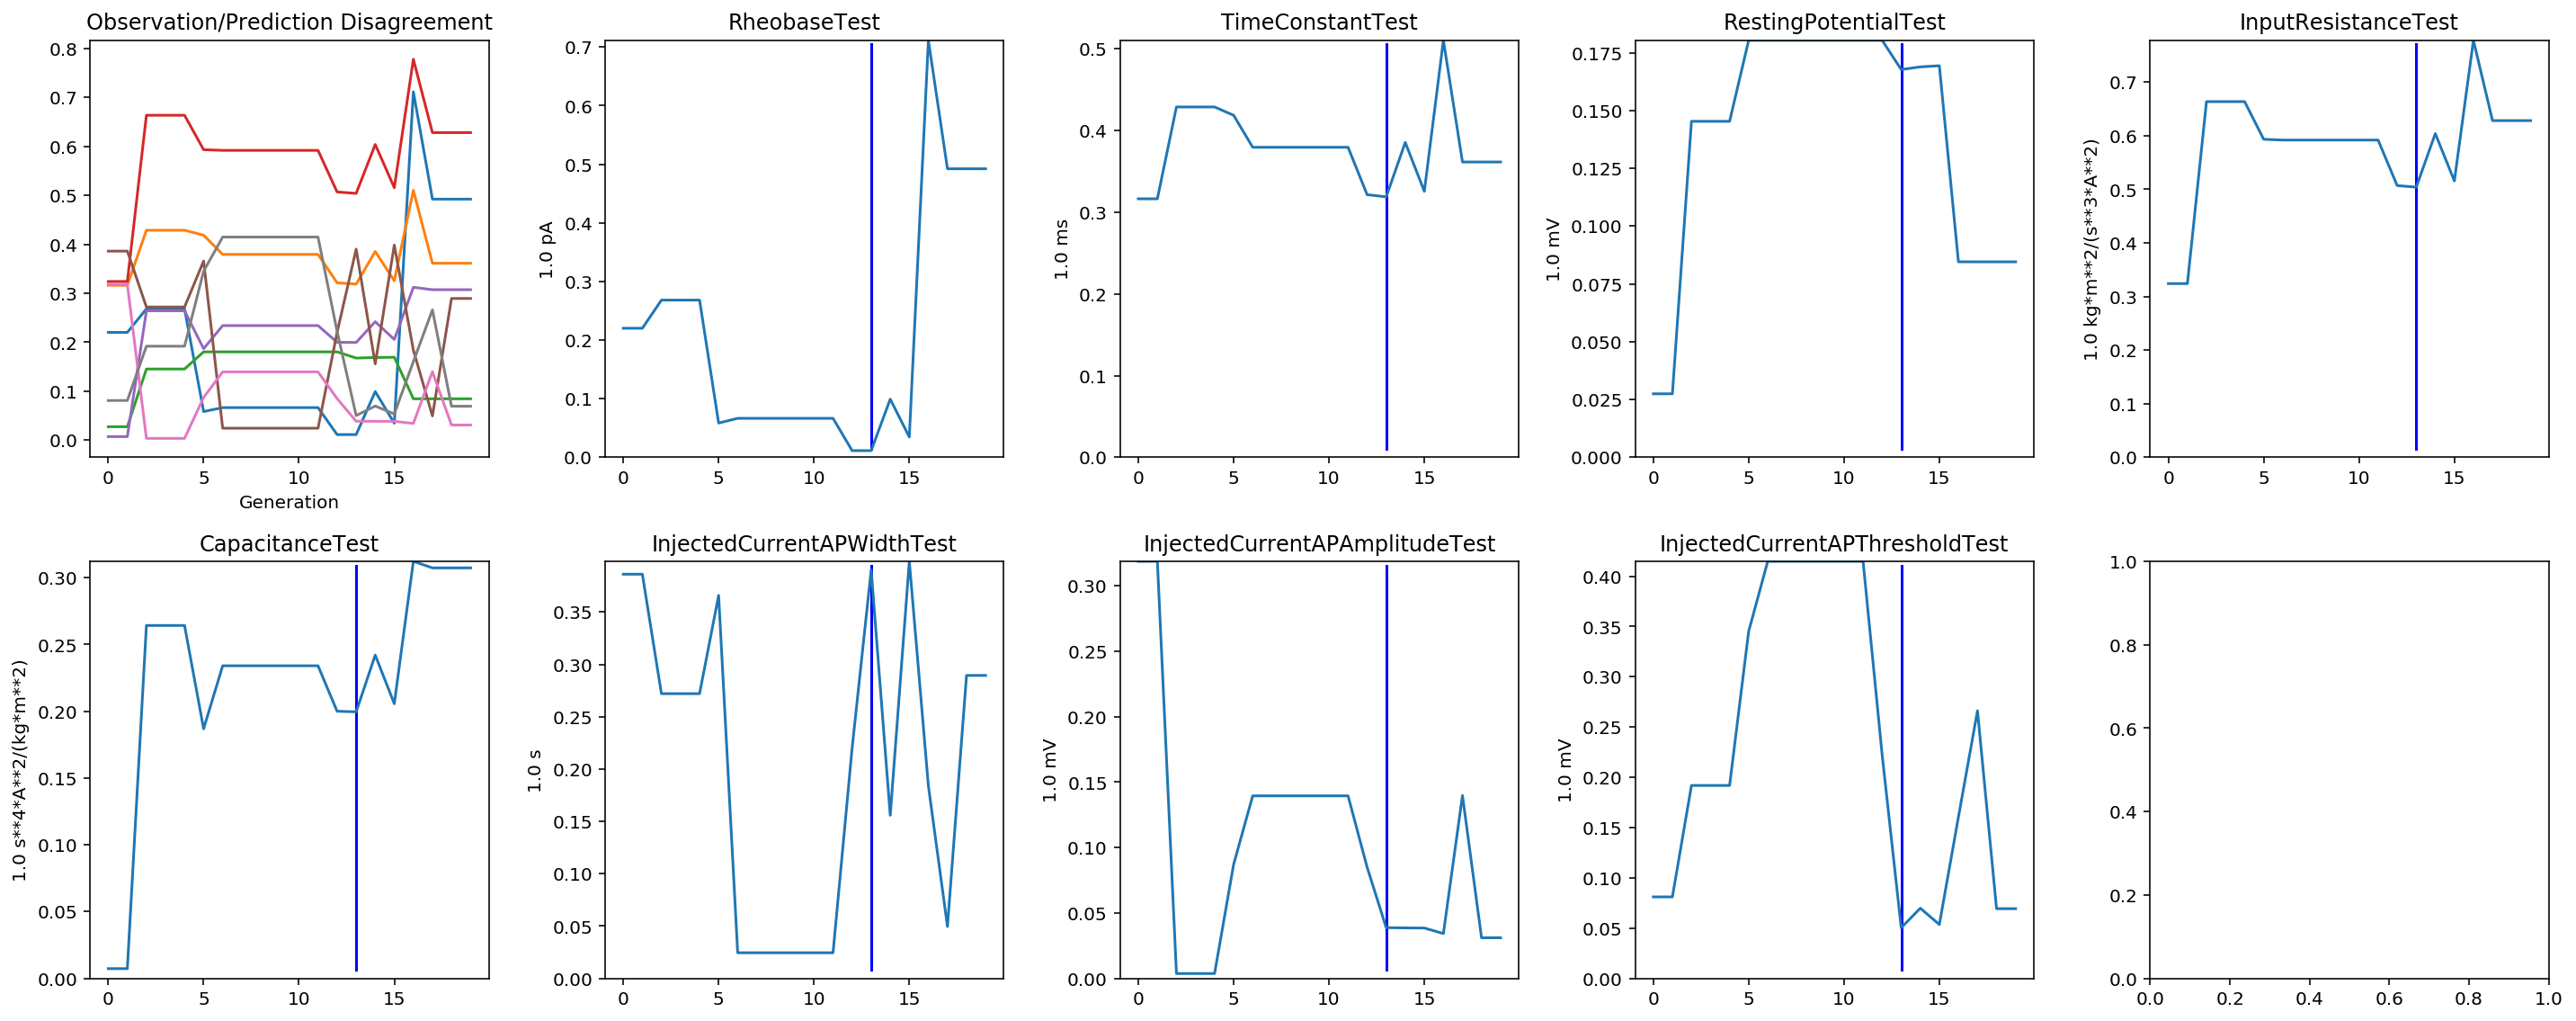

In [11]:
plt = plot_score_history1(results)

In [12]:
for t in results['pop'][0].dtc.tests:
    try:
        print(t.observation['mean']-t.prediction['mean'])
    except:
        print(t.observation['value']-t.prediction['value'])
        
target.rheobase

-63.720703125 pA
0.9212596360444332 ms
-3.4270382067375422 mV
13940171.853659675 kg*m**2/(s**3*A**2)
-1.5991344909090106e-11 s**4*A**2/(kg*m**2)
-0.0001299999999999999 s
-3.6257216731464936 mV
4.144850273199797 mV


{'value': array(185.00976562) * pA,
 'std': array(92.50488281) * pA,
 'mean': array(185.00976562) * pA}

In [13]:
for f in results['pop'][0].fitness.values: print((f))

1.3308391238342152
0.5049381723116225
0.027320208560054675
0.839640566845594
0.4149080086006229
16.3030303030303
2.7330938321850065
13.049819851908973


In [14]:
results['pop'][0].dtc.tests = results['pop'][0].dtc.tests[0:8]
results['pop'][0].dtc.get_agreement()
results['pop'][0].dtc.agreement

RheobaseTest       TimeConstantTest    RestingPotentialTest  \
observations  185.009765625 pA   3.516336859922578 ms   -67.32145791169866 mV   
predictions    248.73046875 pA  2.5950772238781448 ms  -63.894419704961116 mV   
scores                0.711461               0.510348               0.0845708   

                                 InputResistanceTest  \
observations   37680394.84441203 kg*m**2/(s**3*A**2)   
predictions   23740222.990752354 kg*m**2/(s**3*A**2)   
scores                                      0.777941   

                                         CapacitanceTest  \
observations   9.332006403972298e-11 s**4*A**2/(kg*m**2)   
predictions   1.0931140894881308e-10 s**4*A**2/(kg*m**2)   
scores                                          0.312236   

             InjectedCurrentAPWidthTest InjectedCurrentAPAmplitudeTest  \
observations    0.0006600000000000001 s           53.21179743188618 mV   
predictions                   0.00079 s          56.837519105032676 mV   
scores                         0.365823                       0.114733   

             InjectedCurrentAPThresholdTest      total  
observations          -17.57895886052378 mV        NaN  
predictions          -21.723809133723577 mV        NaN  
scores                             0.450618  16.687752

In [15]:
results['pop'][0].dtc.SA

RheobaseTest                      0.711461
TimeConstantTest                  0.510348
RestingPotentialTest              0.084571
InputResistanceTest               0.777941
CapacitanceTest                   0.312236
InjectedCurrentAPWidthTest        0.365823
InjectedCurrentAPAmplitudeTest    0.114733
InjectedCurrentAPThresholdTest    0.450618
dtype: float64

In [16]:
#results['history'].genealogy_history[200].fitness
#results['history'].genealogy_history[200].dtc.vm30

for t in results['pop'][0].dtc.tests:
    print(t.name,np.abs(t.observation['mean'])/t.observation['std'])
    print(t.name,t.observation['mean'],t.observation['std'])

RheobaseTest 2.0 dimensionless
RheobaseTest 185.009765625 pA 92.5048828125 pA
TimeConstantTest 2.0 dimensionless
TimeConstantTest 3.516336859922578 ms 1.758168429961289 ms
RestingPotentialTest 2.0 dimensionless
RestingPotentialTest -67.32145791169866 mV 33.66072895584933 mV
InputResistanceTest 2.0 dimensionless
InputResistanceTest 37680394.84441203 kg*m**2/(s**3*A**2) 18840197.422206014 kg*m**2/(s**3*A**2)
CapacitanceTest 2.0 dimensionless
CapacitanceTest 9.332006403972298e-11 s**4*A**2/(kg*m**2) 4.666003201986149e-11 s**4*A**2/(kg*m**2)
InjectedCurrentAPWidthTest 2.0 dimensionless
InjectedCurrentAPWidthTest 0.0006600000000000001 s 0.00033000000000000005 s
InjectedCurrentAPAmplitudeTest 2.0 dimensionless
InjectedCurrentAPAmplitudeTest 53.21179743188618 mV 26.60589871594309 mV
InjectedCurrentAPThresholdTest 2.0 dimensionless
InjectedCurrentAPThresholdTest -17.57895886052378 mV 8.78947943026189 mV


INFO:numexpr.utils:NumExpr defaulting to 4 threads.


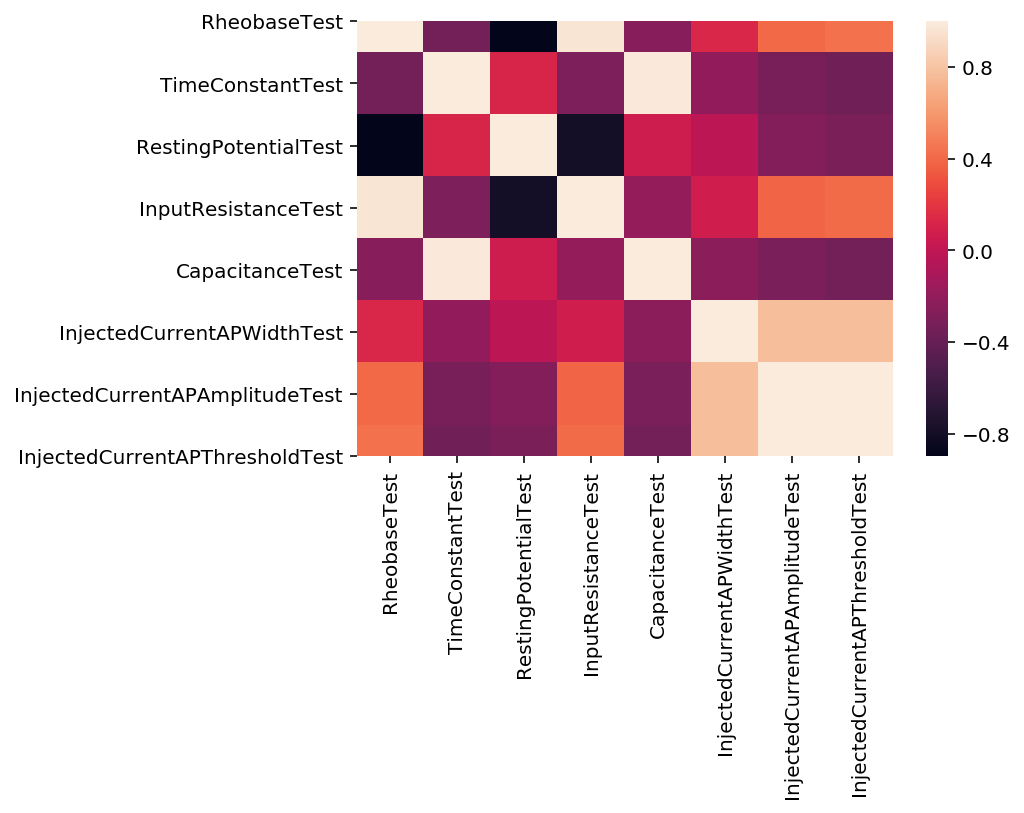

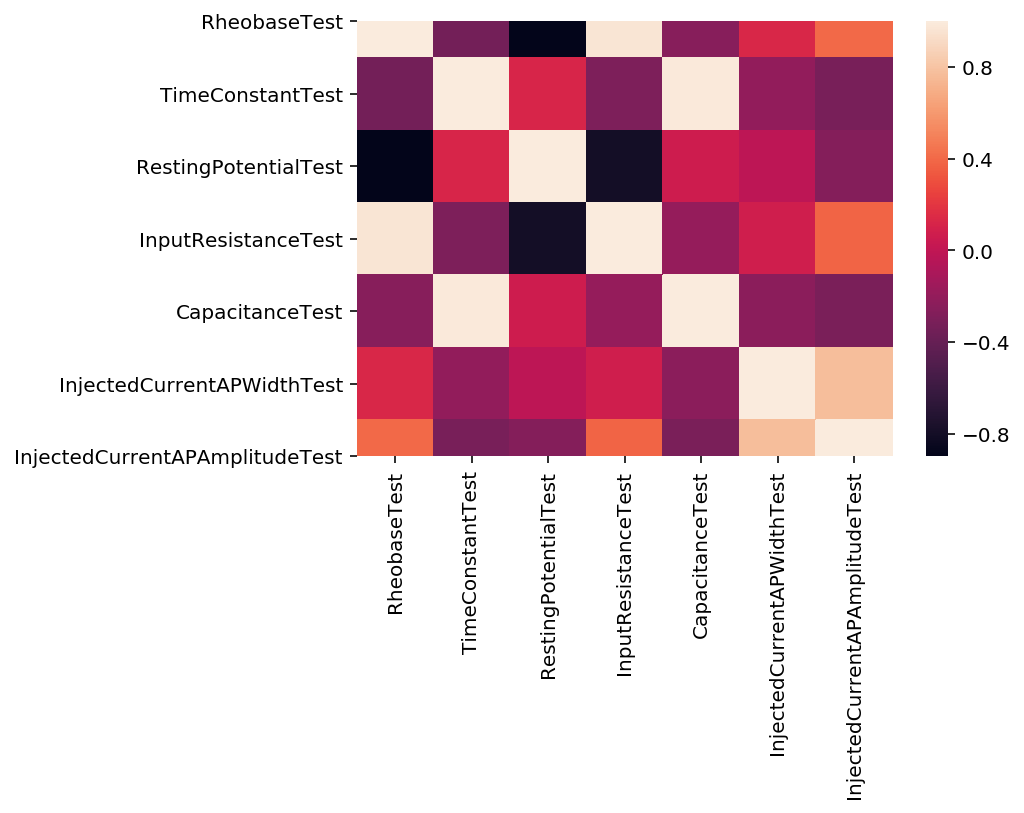

In [17]:


def tighten_bellcurve(tests):
    for k,v in tests.items():
        print(k,v.observation)
        v.observation['std'] = 0.5* v.observation['std']
    return tests
#sim_tests = tighten_bellcurve(sim_tests)
ELEPHANT = False
if ELEPHANT:
    objectives = {k:v for k,v in results['pf'][0].dtc.SA.items() }
    logbook = results['log']
    scores = [ m['max'] for m in logbook ]
    list_of_dicts = []
    df1 = pd.DataFrame()
    for i,(k,v) in enumerate(objectives.items()):
        history = [j[i] for j in scores ]
        df1[str(k)] = pd.Series(history).values#, index=df1.index)


    corr = df1.corr()
    sns.heatmap(corr, 
            xticklabels=corr.columns,
            yticklabels=corr.columns)
if not ELEPHANT:
    objectives = [ t.name for t in results['pf'][0].dtc.tests ]
    logbook = results['log']
    scores = [ m['max'] for m in logbook ]
    list_of_dicts = []
    df1 = pd.DataFrame()
    for i,k in enumerate(objectives[0:10]):
        history = [j[i] for j in scores ]
        df1[str(k)] = pd.Series(history).values#, index=df1.index)


    corr = df1.corr()
    sns.heatmap(corr, 
            xticklabels=corr.columns,
            yticklabels=corr.columns)
    
    plt.show()
    
    df1 = pd.DataFrame()

    for i,k in enumerate(objectives[-11:-1]):
        history = [j[i] for j in scores ]
        df1[str(k)] = pd.Series(history).values#, index=df1.index)


    corr = df1.corr()
    sns.heatmap(corr, 
            xticklabels=corr.columns,
            yticklabels=corr.columns)

    plt.show()


In [18]:
ELEPHANT = True

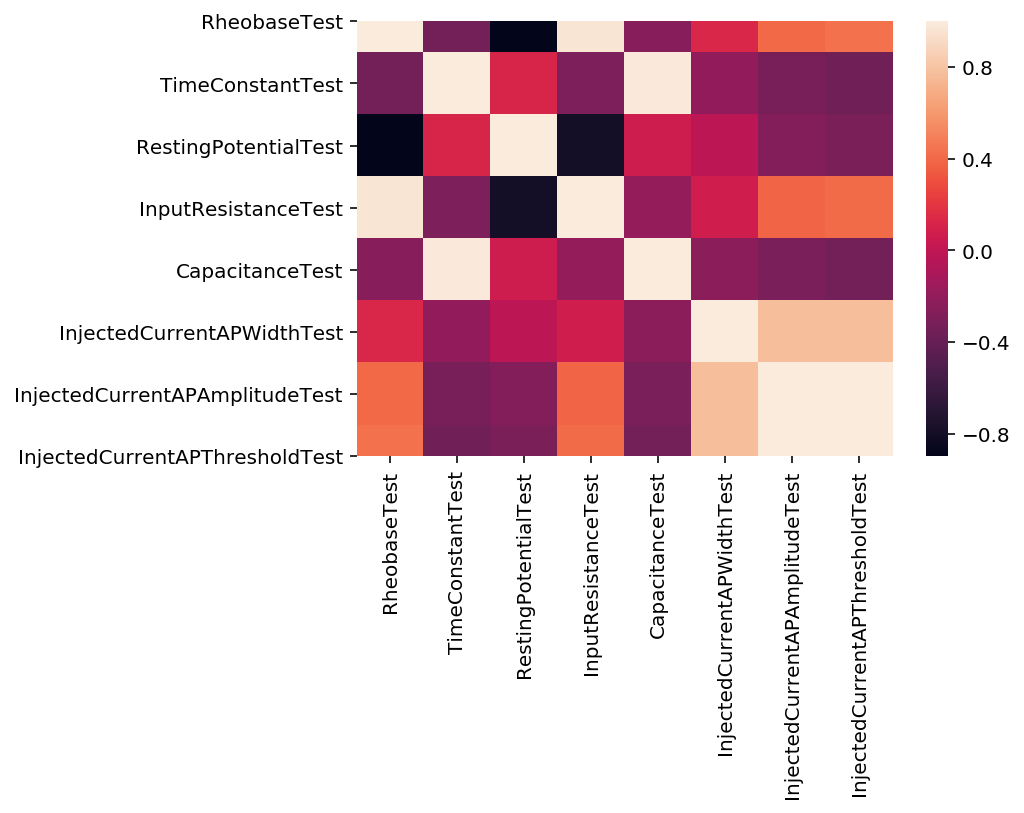

In [19]:
if ELEPHANT:
    objectives = {k:v for k,v in results['pf'][0].dtc.SA.items() }
    logbook = results['log']
    scores = [ m['max'] for m in logbook ]
    list_of_dicts = []
    df1 = pd.DataFrame()
    for i,(k,v) in enumerate(objectives.items()):
        history = [j[i] for j in scores ]
        df1[str(k)] = pd.Series(history).values#, index=df1.index)


    corr = df1.corr()
    sns.heatmap(corr, 
            xticklabels=corr.columns,
            yticklabels=corr.columns)

# There is a block of five error types that seem highly correlated with each other

In [20]:
pop = list(results['history'].genealogy_history.values())
get_min = [(np.sum(j.fitness.values),i) for i,j in enumerate(pop)]
min_gene = sorted(get_min,key = lambda x: x[0])
min_gene = results['history'].genealogy_history[min_gene[0][1]]
min_gene.fitness.values

(0.7114610354591786,
 0.5103479084657337,
 0.08457083846380667,
 0.7779413154175866,
 0.31223598347470377,
 0.18390784865711665,
 0.03425066437127761,
 0.16042042078286733)

In [21]:
from neuronunit.optimisation.optimization_management import dtc_to_rheo
def local_hof(results,dtc):
    pop = list(results['history'].genealogy_history.values())
    get_min = [(np.sum(j.fitness.values),i) for i,j in enumerate(pop)]
    min_gene = sorted(get_min,key = lambda x: x[0])
    min_gene = results['history'].genealogy_history[min_gene[0][1]]
    OM = dtc.dtc_to_opt_man()
    dtc.attrs.pop("Iext",None)
    dtc.attrs.pop("dt",None)
    frozen = OrderedDict(dtc.attrs)
    for i,(k,v) in enumerate(frozen.items()):
        dtc.attrs[k] = min_gene[i]
    dtc = dtc_to_rheo(dtc)
    dtc = OM.format_test(dtc)
    dtc.self_evaluate()
    return dtc
dtc = results['pf'][0].dtc

opt = local_hof(results,dtc)
print(opt.SA)
opt.rheobase
#d#tg = dtc_to_rheo(opt)
#dtg.rheobase
#print(dtg.rheobase)
#dtg.attrs



RheobaseTest                      0.711461
TimeConstantTest                  0.510348
RestingPotentialTest              0.084571
InputResistanceTest               0.777941
CapacitanceTest                   0.312236
InjectedCurrentAPWidthTest        0.365823
InjectedCurrentAPAmplitudeTest    0.114733
InjectedCurrentAPThresholdTest    0.450618
dtype: float64


array(248.73046875) * pA

In [22]:
opt.attrs.pop("Iext",None)
opt.attrs.pop("dt",None)

0.01

In [23]:
#from collections import OrderedDict
#opt = results['pop'][0].dtc
#frozen = OrderedDict(opt.attrs)
#print(frozen)
opt = results['pop'][0].dtc
print(target.rheobase, opt.rheobase)
opt.SA


{'value': array(185.00976562) * pA, 'std': array(92.50488281) * pA, 'mean': array(185.00976562) * pA} 248.73046875 pA


RheobaseTest                      0.711461
TimeConstantTest                  0.510348
RestingPotentialTest              0.084571
InputResistanceTest               0.777941
CapacitanceTest                   0.312236
InjectedCurrentAPWidthTest        0.365823
InjectedCurrentAPAmplitudeTest    0.114733
InjectedCurrentAPThresholdTest    0.450618
dtype: float64

In [24]:
import copy
backup_tests = copy.copy(opt.tests)
opt.tests = opt.tests[0:8]

opt.self_evaluate()
opt.get_agreement()
opt.agreement


RheobaseTest       TimeConstantTest    RestingPotentialTest  \
observations  185.009765625 pA   3.516336859922578 ms   -67.32145791169866 mV   
predictions    248.73046875 pA  2.5950772238781448 ms  -63.894419704961116 mV   
scores                0.711461               0.510348               0.0845708   

                                 InputResistanceTest  \
observations   37680394.84441203 kg*m**2/(s**3*A**2)   
predictions   23740222.990752354 kg*m**2/(s**3*A**2)   
scores                                      0.777941   

                                         CapacitanceTest  \
observations   9.332006403972298e-11 s**4*A**2/(kg*m**2)   
predictions   1.0931140894881308e-10 s**4*A**2/(kg*m**2)   
scores                                          0.312236   

             InjectedCurrentAPWidthTest InjectedCurrentAPAmplitudeTest  \
observations    0.0006600000000000001 s           53.21179743188618 mV   
predictions                   0.00079 s          56.837519105032676 mV   
scores                         0.365823                       0.114733   

             InjectedCurrentAPThresholdTest      total  
observations          -17.57895886052378 mV        NaN  
predictions          -21.723809133723577 mV        NaN  
scores                             0.450618  16.687752

In [25]:
#opt = results['pf'][0].dtc
opt.self_evaluate()
opt.get_agreement()
check_binary_match(opt,target,snippets=True)
target = OM.format_test(target)
results.keys()


dict_keys(['pop', 'hof', 'pf', 'log', 'history', 'td', 'min_gene'])

In [26]:
for t in opt.tests:
    #print(t.observation,t.prediction)
    try:
        print(np.abs(t.observation['mean']-t.prediction['mean']))
    except:
        pass
       # print(np.abs(t.observation['value']-t.prediction['value']))

        
opt.rheobase


3.4270382067375422 mV
0.0001299999999999999 s
3.6257216731464936 mV
4.144850273199797 mV


array(248.73046875) * pA

In [27]:
def check_bin_vm15(target,opt):
    plt.plot(target.vm15.times,target.vm15.magnitude)
    plt.plot(opt.vm15.times,opt.vm15.magnitude)
    plt.show()

In [28]:

def basic_expVar(trace1, trace2):
    '''This is the fundamental calculation that is used in all different types of explained variation.  
    At a basic level, the explained variance is calculated between two traces.  These traces can be PSTH's
    or single spike trains that have been convolved with a kernel (in this case always a Gaussian)
    Input:
        trace 1 & 2:  1D numpy array containing values of the trace.  (This function requires numpy array
                        to ensure that this is not a multidemensional list.)
    Returns:
        expVar:  float value of explained variance
    '''
   
    var_trace1=np.var(trace1)
    var_trace2=np.var(trace2)
    var_trace1_minus_trace2=np.var(trace1-trace2)

    if var_trace1_minus_trace2 == 0.0:
        return 1.0
    else:
        return (var_trace1+var_trace2-var_trace1_minus_trace2)/(var_trace1+var_trace2)
    
print(basic_expVar(opt.vm15.magnitude, target.vm15.magnitude))    

AttributeError: 'DataTC' object has no attribute 'vm15'

In [ ]:


opt = results['pop'][0].dtc
check_binary_match(opt,target,snippets=True)

In [ ]:
check_binary_match(opt,target,snippets=False)

In [ ]:
from neuronunit.optimisation.optimization_management import inject_and_plot_passive_model
inject_and_plot_passive_model(opt,second=target,figname=None,plotly=False)




In [ ]:
opt.agreement
check_bin_vm15(target,opt)

In [ ]:
plt.clf()
plt.plot(target.vm15.times,target.vm15.magnitude)
plt.show()


In [ ]:
plt.clf()
plt.plot(opt.vm15.times,opt.vm15.magnitude)
plt.show()

In [ ]:
opt.SA


In [ ]:
#target.tests.keys()
target.tests[-1].prediction

In [ ]:
opt.tests[-1].prediction

# Get crowding distance on two solutions

# Hall of fame and pareto front are not working properly. 
I think it is because the individual they were expecting is different to what they are getting.
# TODO re-align with BluePyOpt algorithm and optimisation

In [ ]:
results['min_gene'].SA
#results['min_gene'].get_agreement()
#results['min_gene'].agreement

In [ ]:
results['pop'][0].dtc.SA
results['pop'][0].dtc.get_agreement()
results['pop'][0].dtc.agreement

In [ ]:
'''
results['hof'][0].dtc.SA
results['hof'][0].dtc.get_agreement()
results['hof'][0].dtc.agreement
'''
print(results['pop'][0].fitness)
results['pf'].update([results['pop'][0]])
results['pf'][0].fitness

results['hof'].update([results['pop'][0]])
results['hof'][0].fitness

In [ ]:
for t in target.tests.values():
    #print(t.prediction,t.name)
    print(t.observation['mean'],t.name)
    
for t in sim_tests.values():    
    print(t.observation['mean'],t.name)  
    print(t.prediction,t.name)


In [ ]:
def parition(sim_tests,model_type):
    results0 = sim_tests.optimize(backend=model_type,\
            protocol={'allen': False, 'elephant': True},\
                MU=MU,NGEN=NGEN,plot=True,free_parameters=['c','a','b'])

    plt = plot_score_history1(results0)

    results1 = sim_tests.optimize(backend=model_type,\
            protocol={'allen': False, 'elephant': True},\
                MU=MU,NGEN=NGEN,plot=True,free_parameters=
                                  ['k','C','d'],seed_pop=results0['pop'][0:10]\
                                  ,hc=['c','a','b'])

    plt = plot_score_history1(results1)
    results2 = sim_tests.optimize(backend=model_type,\
        protocol={'allen': False, 'elephant': True},\
            MU=MU,NGEN=NGEN,plot=True,\
            free_parameters=['vr','vPeak'],\
            seed_pop=results1['pop'][0:10],hc=['c','a','d','b','k','C'])
    plt = plot_score_history1(results2)


    results = sim_tests.optimize(backend=model_type,\
            protocol={'allen': False, 'elephant': True},\
                MU=MU,NGEN=NGEN,plot=True,\
                free_parameters=fps,\
                seed_pop=results2['pop'][0:10])

    plt = plot_score_history1(results)
    return results
results = parition(sim_tests,model_type)

# Analyse Results

# Compare scores above to random scores below

In [ ]:
# This should be more succint than above.
agreement = opt.get_agreement().agreement
display(out['frame'])


In [ ]:
out['best_random_sum_total']

# Look at evolution History

In [ ]:
plt = plot_score_history1(results)
from neuronunit.optimisation.optimization_management import check_binary_match
plt.show()

In [ ]:
check_binary_match(opt,target,snippets=False)

In [ ]:
try:
    opt.attrs.pop('dt',None)
    opt.attrs.pop('Iext',None)
except:
    pass


In [ ]:
display(pd.DataFrame([opt.attrs]))
import copy
temp = {}
for k in opt.attrs.keys():
    temp[k] = target.attrs[k]
display(pd.DataFrame([temp]))

In [ ]:
display(pd.DataFrame([{k.name:v for k,v in opt.SA.items()}]))

What where the values of model parameters that where held constant?


In [ ]:
df0 = opt.dtc_to_model().default_attrs
df1 = target.dtc_to_model().default_attrs
hc = {}

try:
    df0.attrs.pop('dt',None)
    df0.attrs.pop('Iext',None)
    opt.attrs.pop('dt',None)
    opt.attrs.pop('Iext',None)

except:
    pass

for k,v in df0.items():
    if k not in opt.attrs.keys():
        assert df0[k] == df1[k]
        hc[k] = v        
display("Held constant:")
display(pd.DataFrame([hc]))        

If the Pareto Front encircles the best solution without sampling directly on top of it.
Does piercing the center get us closer to the hall of fame?
Below, plot HOF[0]/PF[0] are they the same model? 

In [ ]:
# check_binary_match(opt,hof,snippets=True)


# Exploring the neighbourhood of 
the Optimal solution is now syntatically easy

## Make ranges to explore:

In [ ]:
from neuronunit.optimisation.model_parameters import MODEL_PARAMS
a_range = MODEL_PARAMS["RAW"]['a']
grid_a = np.linspace(a_range[0],a_range[1],25)




## Mutate a parameter in a dimension of interest.

In [ ]:
opt_sum0 = np.sum(opt.SA.values)
for_scatter0 = (opt.attrs['a'],opt_sum0)
from tqdm import tqdm
collect = []
mutant = copy.copy(opt)
for a in tqdm(grid_a):
    # non random mutation
    mutant.attrs['a'] = a
    # Evaluate NU test suite
    mutant.self_evaluate()
    # sum components (optional)
    fit = np.sum(mutant.SA.values)
    collect.append(fit)
plt.plot(grid_a,collect)
plt.scatter(for_scatter0[0],for_scatter0[1],label='optima')
    

The above plot seemed to have multiple steep wells of low error about the optima.

It might not be reasonable to expect to sample every such well, as the stochastic and non exhuastive sampling in the GA means it is not garunteed to sample small and and focused pockets of error change.

In [ ]:
b_range = MODEL_PARAMS["RAW"]['b']
grid_b = np.linspace(b_range[0],b_range[1],30);

In [ ]:
opt_sum = np.sum(opt.SA.values)
for_scatter1 = (opt.attrs['b'],opt_sum)
from tqdm import tqdm
collect = []
mutant = copy.copy(opt)
for b in tqdm(grid_b):
    # non random mutation
    mutant.attrs['b'] = b
    # Evaluate NU test suite
    mutant.self_evaluate()
    # sum components (optional)
    fit = np.sum(mutant.SA.values)
    collect.append(fit)
plt.plot(grid_b,collect)
plt.scatter(for_scatter1[0],for_scatter1[1],label='optima')


# Compare the match of passive waveforms

In [ ]:

#from neuronunit.optimisation.optimization_management import inject_and_plot_passive_model
#inject_and_plot_passive_model(opt)
import quantities as pq
tm = target.dtc_to_model()

model = opt.dtc_to_model()
uc = {'amplitude':-10*pq.pA,'duration':500*pq.ms,'delay':100*pq.ms}
model.inject_square_current(uc)
vm1 = model.get_membrane_potential()
tm.inject_square_current(uc)
vm0 = tm.get_membrane_potential()
plt.plot(vm1.times, vm1.magnitude, c='b',label=str('opt ADEXP'))#+str(model.attrs['a']))
plt.plot(vm0.times, vm0.magnitude, c='r',label=str('target HH'))#+str(model.attrs['a']))

plt.show()